### Data Description:

- **Date :** The timestamps indicate the date from 2017 to 2022.

- **Zone Name:** This column indicates the geographical zone or region within the Greater Hyderabad Municipal Corporation (GHMC) area where the weather data was recorded. The GHMC zones include North Zone, Central Zone, East Zone, West Zone, and South Zone.

- **QV10M (10-meter specific humidity):** This column represents the mass fraction of water vapor in the air at a height of 10 meters above the surface. It gives insight into the humidity levels in the atmosphere, which is crucial for understanding local weather patterns and potential for precipitation. (Units: Mass fraction)

- **T2M (2-meter air temperature):** This column indicates the air temperature at a height of 2 meters above the surface. It provides information about the local temperature conditions, which influences various aspects of daily life, including human comfort, agriculture, and energy consumption. (Units: Kelvin)

- **U10M (10-meter eastward wind) and V10M (10-meter northward wind):** These columns represent the eastward and northward components of wind speed at a height of 10 meters above the surface, respectively. They describe the speed and direction of the wind, which are important factors for understanding weather patterns, air circulation, and potential impacts such as storm events. (Units: meters per second)

- **precipitationCal (calibrated precipitation data):** This column provides information about the calibrated precipitation data, measured in millimeters per day. It indicates the rate of rainfall, which is critical for assessing the risk of flooding, managing water resources, and understanding the impact of precipitation on urban infrastructure and the environment. (Units: Millimeters per day)


In [1]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [ ]:
#loading data
df=pd.read_csv(r'D:\Re-Hatespeech\GPM_DataProject\Urban-Rainfall-Analysis-and-Prediction-GPM-Data-project-\data_preprocessing\finalprecipitation_data.csv')

In [33]:
df.head()

,Date,Zone_Name,Specific_Humidity_10m,Air_Temperature_2m,Eastward_Wind_10m,Northward_Wind_10m,Precipitation_mm,Year
0,2017-01-01,Central Zone,0.007663,20.864690,-4.095102,6.032706,0.0,2017
1,2017-01-01,East Zone,0.007646,20.864623,-4.035985,6.143598,0.0,2017
2,2017-01-01,North Zone,0.007604,20.864455,-3.888297,6.420636,0.0,2017
3,2017-01-01,South Zone,0.007663,20.864690,-4.095102,6.032706,0.0,2017
4,2017-01-01,West Zone,0.007610,20.864480,-3.909974,6.379974,0.0,2017


In [2]:
# Check for null values
null_values = df.isnull().sum()
print("Null Values:")
print(null_values)
print("\n")


Null Values:
Date                     0
Zone_Name                0
Specific_Humidity_10m    0
Air_Temperature_2m       0
Eastward_Wind_10m        0
Northward_Wind_10m       0
Precipitation_mm         0
dtype: int64




There is no null values present  

In [3]:

# Display information and descriptive statistics
print("Data Info:")
print(df.info())
print("\n")


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10955 entries, 0 to 10954
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   10955 non-null  object 
 1   Zone_Name              10955 non-null  object 
 2   Specific_Humidity_10m  10955 non-null  float64
 3   Air_Temperature_2m     10955 non-null  float64
 4   Eastward_Wind_10m      10955 non-null  float64
 5   Northward_Wind_10m     10955 non-null  float64
 6   Precipitation_mm       10955 non-null  float64
dtypes: float64(5), object(2)
memory usage: 599.2+ KB
None




All columns have 10,955 non-null values, indicating that there are no missing values in any column.

In [9]:
# Define a mapping dictionary for zone names
zone_mapping = {
    'Greater Hyderabad Municipal Corporation Central Zone': 'Central Zone',
    'Greater Hyderabad Municipal Corporation East Zone': 'East Zone',
    'Greater Hyderabad Municipal Corporation North Zone': 'North Zone',
    'Greater Hyderabad Municipal Corporation South Zone': 'South Zone',
    'Greater Hyderabad Municipal Corporation West Zone': 'West Zone'
}

# Apply the mapping to the 'Zone_Name' column
df['Zone_Name'] = df['Zone_Name'].map(zone_mapping)

In [10]:
# Group by 'Zone_Name' and compute summary statistics for each numerical column
summary_stats = df.groupby('Zone_Name').describe()

# Print summary statistics for each numerical column
for column in df.select_dtypes(include='float64').columns:
    print(f"Summary statistics for {column}:")
    print(summary_stats[column])
    print("\n")


Summary statistics for Specific_Humidity_10m:
               count      mean       std       min       25%       50%  \
Zone_Name                                                                
Central Zone  2191.0  0.012721  0.004097  0.002054  0.009604  0.012824   
East Zone     2191.0  0.012675  0.004162  0.001990  0.009483  0.012748   
North Zone    2191.0  0.012562  0.004335  0.001831  0.009125  0.012552   
South Zone    2191.0  0.012721  0.004097  0.002054  0.009604  0.012824   
West Zone     2191.0  0.012578  0.004309  0.001854  0.009178  0.012578   

                   75%       max  
Zone_Name                         
Central Zone  0.016603  0.019250  
East Zone     0.016663  0.019282  
North Zone    0.016759  0.019403  
South Zone    0.016603  0.019250  
West Zone     0.016744  0.019358  


Summary statistics for Air_Temperature_2m:
               count       mean       std        min        25%        50%  \
Zone_Name                                                          

Observations from the summary statistics for each variable grouped by zone:


**Specific Humidity (10-meter)**

- **Average**: 0.0127
- **Standard Deviation**: 0.004
- **Minimum**: ~0.002
- **Maximum**: ~0.019

The average specific humidity across all zones indicates a relatively dry atmosphere with minimal variation between zones. However, occasional spikes in moisture content are observed.

**Air Temperature (2-meter)**

- **Average**: 26°C
- **Standard Deviation**: 4.2°C
- **Minimum**: 15.6°C
- **Maximum**: 37.5°C

Hyderabad experiences a typical warm climate with some variation in temperature across zones and days, showcasing significant seasonal or daily temperature ranges.

**Eastward Wind (10-meter)**

- **Average**: 1.7-1.8 m/s
- **Standard Deviation**: 10-11 m/s
- **Maximum (Easterly)**: 47 m/s
- **Maximum (Westerly)**: -21 m/s

The prevailing weak easterly flow is occasionally interrupted by strong eastward winds, with sporadic occurrences of westerly winds.

**Northward Wind (10-meter)**

- **Average**: 0.4-0.5 m/s
- **Standard Deviation**: 6.6 m/s
- **Maximum (Northerly)**: 19 m/s
- **Maximum (Southerly)**: -20 m/s

Similar to eastward winds, weak northerly flow is occasionally disrupted by strong northerly or southerly winds.

**Precipitation**

- **Average**: 0.7-1.3 mm
- **Standard Deviation**: 2-3.5 mm
- **Minimum**: 0 mm
- **Maximum**: >35 mm (up to 63 mm in the West Zone)

Hyderabad experiences a generally dry climate with occasional significant rainfall events, along with frequent dry days.

These summary statistics provide valuable insights into the weather patterns of Hyderabad, indicating a warm and generally dry climate with occasional variations in temperature, wind, and rainfall.
.

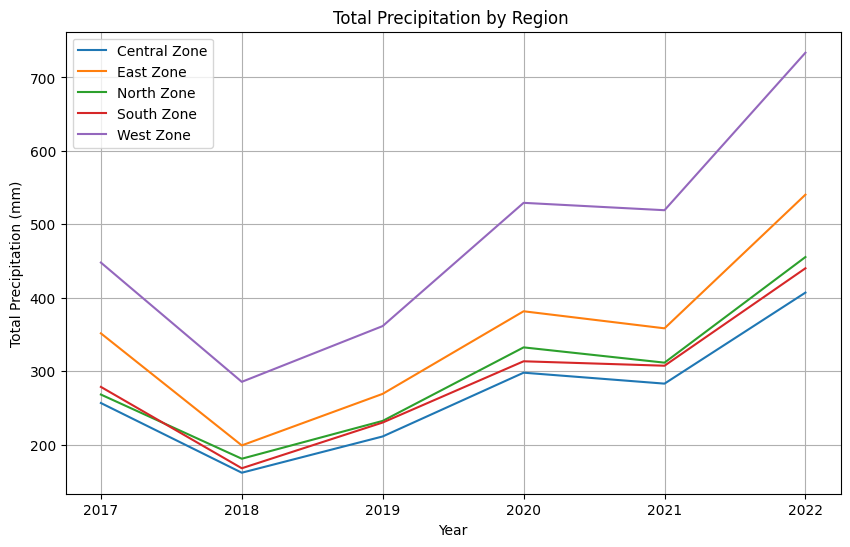

In [12]:




# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from 'Date' and create a new column
df['Year'] = df['Date'].dt.year

# Group data by 'Zone_Name' and 'Year', and calculate total precipitation for each group
precipitation_by_zone_year = df.groupby(['Zone_Name', 'Year'])['Precipitation_mm'].sum().reset_index()

# Plot line chart for precipitation by region year-wise
plt.figure(figsize=(10, 6))
for zone_name, data in precipitation_by_zone_year.groupby('Zone_Name'):
    plt.plot(data['Year'], data['Precipitation_mm'], label=zone_name)

plt.title('Total Precipitation by Region ')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()



 Observations from Line Plot of Total Monthly Precipitation (2017-2022) for Each Zone in GHMC:

**Seasonal Trends:**
- There is a noticeable seasonal pattern in precipitation, with higher values during the monsoon months (likely June to September) and lower values during the drier months. This pattern is typical for many tropical and subtropical regions.

**Year-to-Year Variations:**
- Precipitation totals vary across the years, with some years experiencing higher overall precipitation compared to others. For instance, 2020 appears to have had more rainfall than 2019 based on the plot.

**Zonal Variations:**
- There are variations in total precipitation between the zones. While it's challenging to determine exact trends definitively from the plot alone, some zones may receive more rainfall than others on average. For example, the Central Zone might experience higher precipitation compared to the West Zone based on the plot.

**Specific Observations:**
- In 2022, precipitation seems consistently higher across all zones compared to previous years.
- A significant rainfall event around June or July of 2018 caused a spike in precipitation for all zones.
- The West Zone generally exhibits lower precipitation compared to other zones throughout the years.



<Figure size 1500x1000 with 0 Axes>

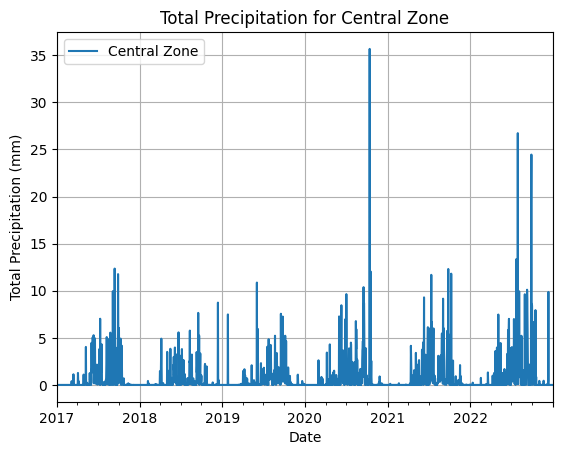

<Figure size 1500x1000 with 0 Axes>

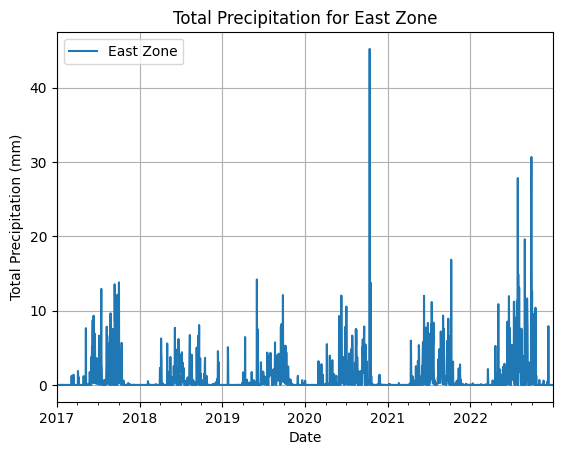

<Figure size 1500x1000 with 0 Axes>

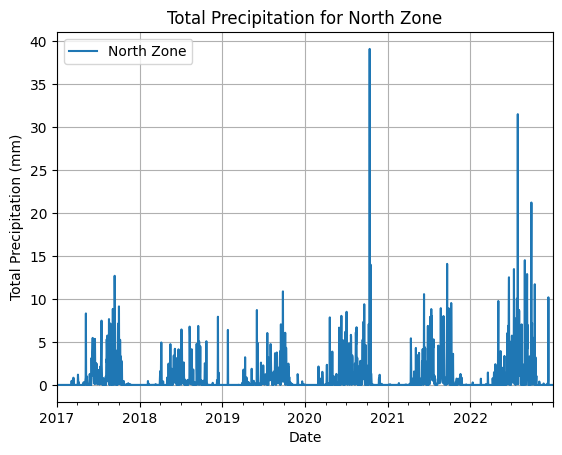

<Figure size 1500x1000 with 0 Axes>

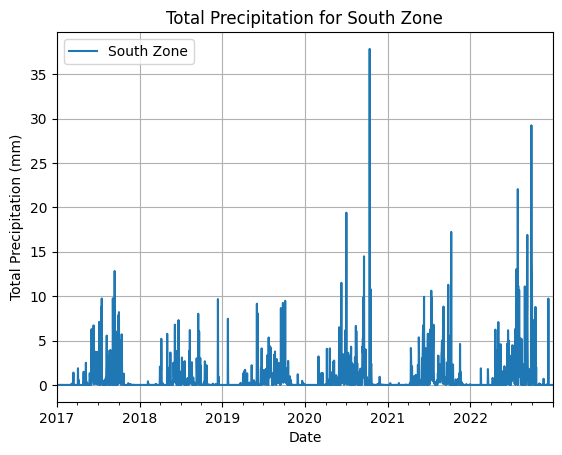

<Figure size 1500x1000 with 0 Axes>

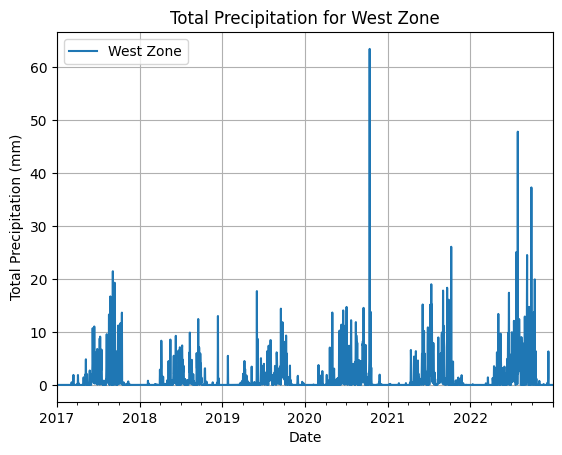

In [17]:

# Group data by 'Zone_Name' and 'Date', and calculate total precipitation for each group
precipitation_by_zone_date = df.groupby(['Zone_Name', 'Date'])['Precipitation_mm'].sum().reset_index()

# Create separate plots for each region
for zone_name, data in precipitation_by_zone_date.groupby('Zone_Name'):
    # Create pivot table for the current region
    pivot_table = data.pivot(index='Date', columns='Zone_Name', values='Precipitation_mm')
    
    # Plotting
    plt.figure(figsize=(15, 10))
    pivot_table.plot(title=f'Total Precipitation for {zone_name}', xlabel='Date', ylabel='Total Precipitation (mm)')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()


 Zone-wise Observations of Precipitation in Hyderabad (2017-2022)

Based on the time series plots, all zones in Hyderabad (Central, East, North, South, and West) exhibit a clear seasonal pattern in precipitation over the years 2017-2022. This pattern is characterized by:

- A strong peak during the monsoon season (likely June to September).
- Considerably lower precipitation values during the remaining months (November to May).

**Central Zone:**
- Possible increasing trend in total precipitation across years.
- 2022 appears to be the year with the highest precipitation.

**East Zone:**
- Possible increasing trend in total precipitation across years.
- 2022 appears to be the year with the highest precipitation.

**North Zone:**
- Possible increasing trend in total precipitation across years.
- 2022 appears to be the year with the highest precipitation.

**South Zone:**
- Possible increasing trend in total precipitation across years.
- 2022 appears to be the year with the highest precipitation.

**West Zone:**
- Generally receives lower precipitation compared to other zones throughout the years.
- Possible increasing trend in total precipitation across years.
- 2022 appears to be the year with the highest precipitation.



Overall, these observations suggest that while there is a clear seasonal pattern in precipitation across all zones, there might be an slight increasing trend in total precipitation over the past five years. However, further investigation with more data is recommended for a conclusive analysis.


<Figure size 1500x1000 with 0 Axes>

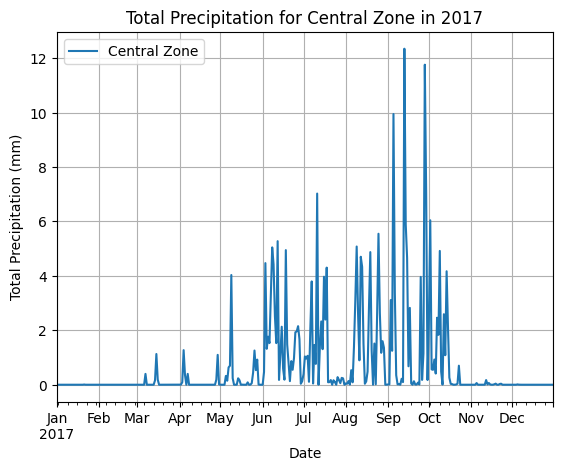

<Figure size 1500x1000 with 0 Axes>

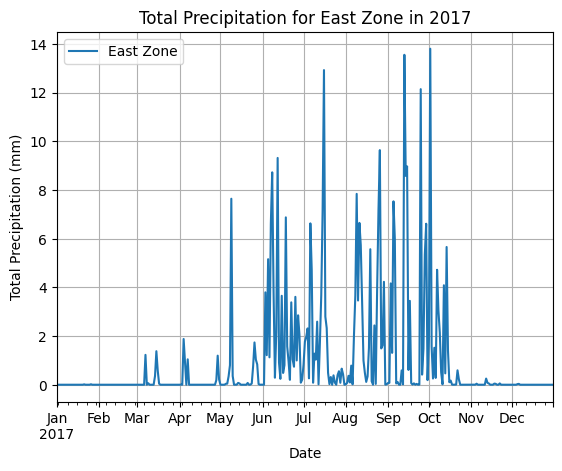

<Figure size 1500x1000 with 0 Axes>

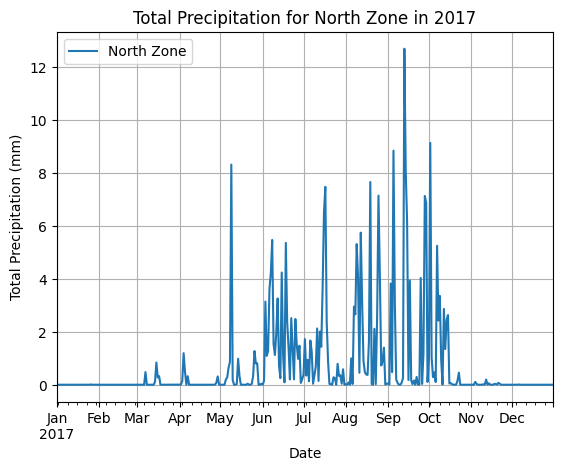

<Figure size 1500x1000 with 0 Axes>

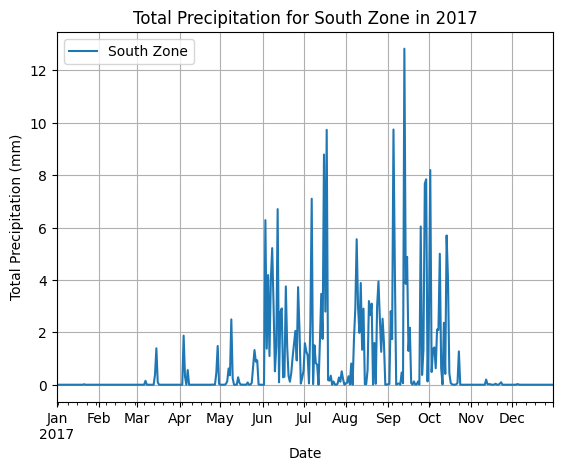

<Figure size 1500x1000 with 0 Axes>

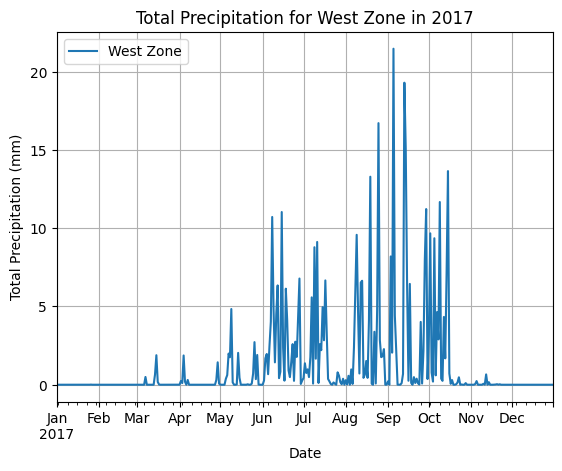

<Figure size 1500x1000 with 0 Axes>

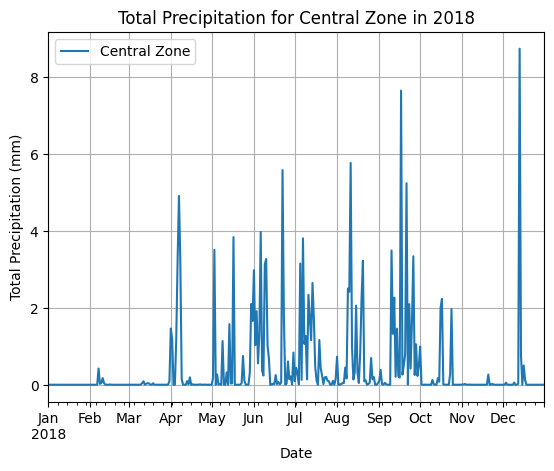

<Figure size 1500x1000 with 0 Axes>

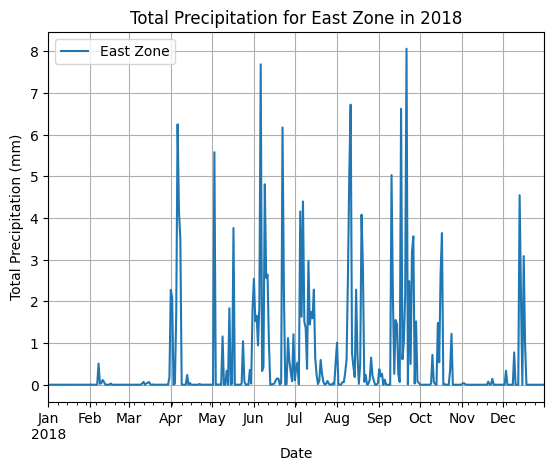

<Figure size 1500x1000 with 0 Axes>

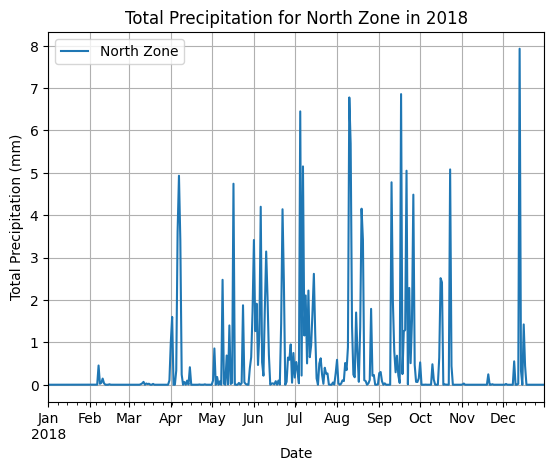

<Figure size 1500x1000 with 0 Axes>

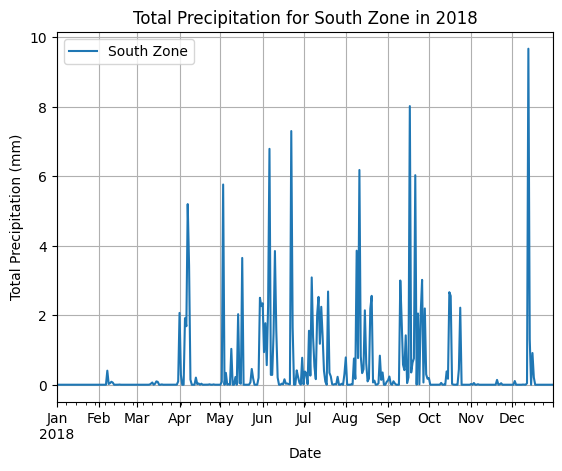

<Figure size 1500x1000 with 0 Axes>

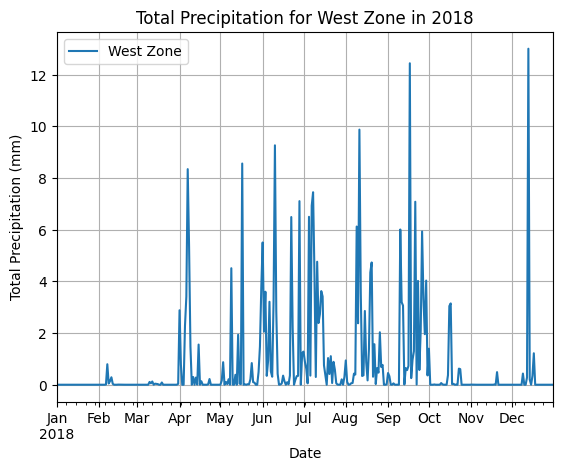

<Figure size 1500x1000 with 0 Axes>

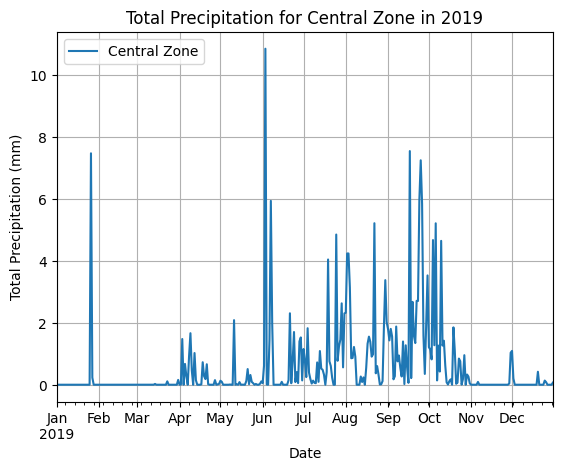

<Figure size 1500x1000 with 0 Axes>

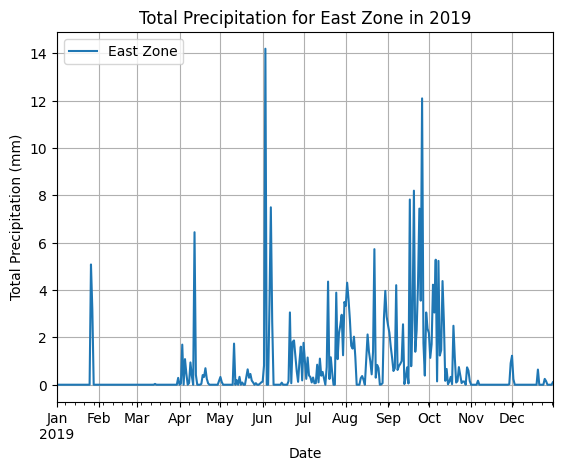

<Figure size 1500x1000 with 0 Axes>

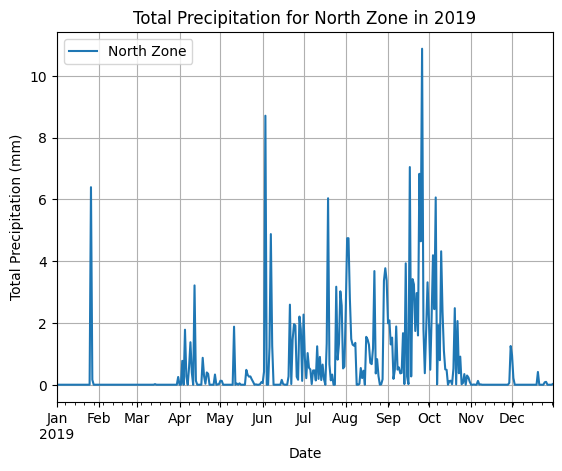

<Figure size 1500x1000 with 0 Axes>

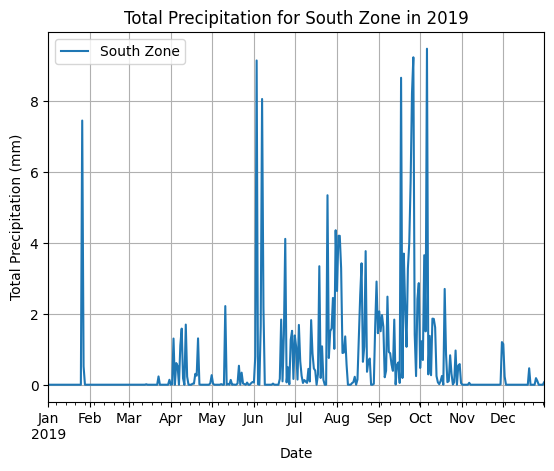

<Figure size 1500x1000 with 0 Axes>

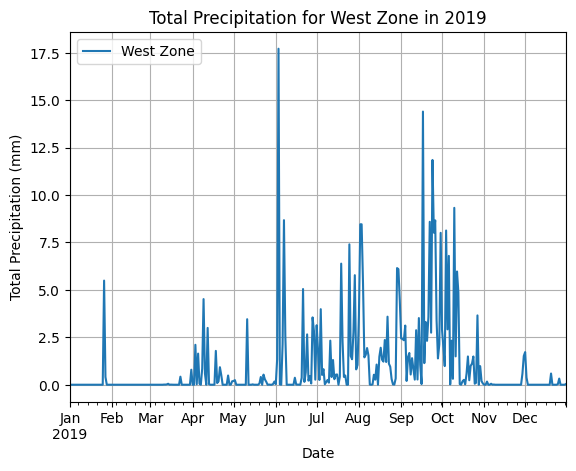

<Figure size 1500x1000 with 0 Axes>

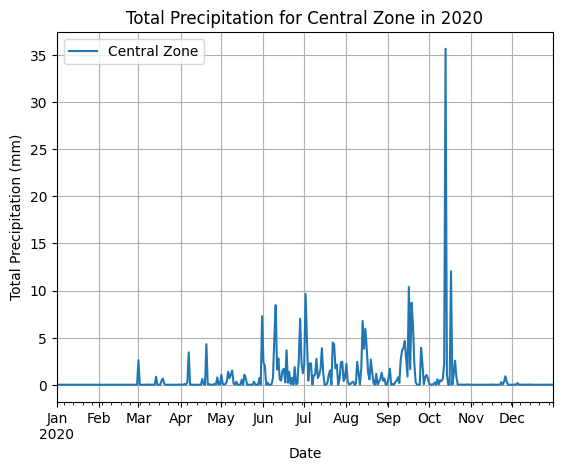

<Figure size 1500x1000 with 0 Axes>

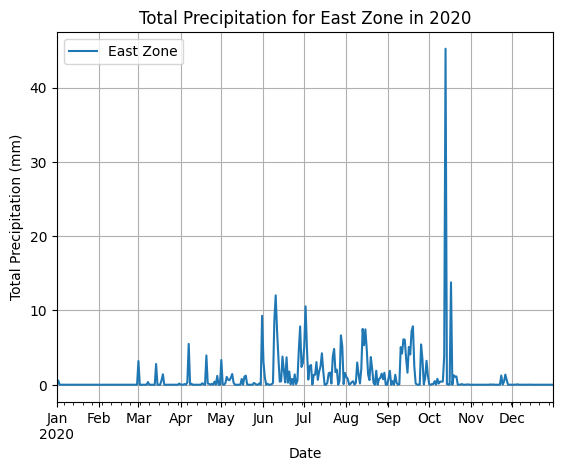

<Figure size 1500x1000 with 0 Axes>

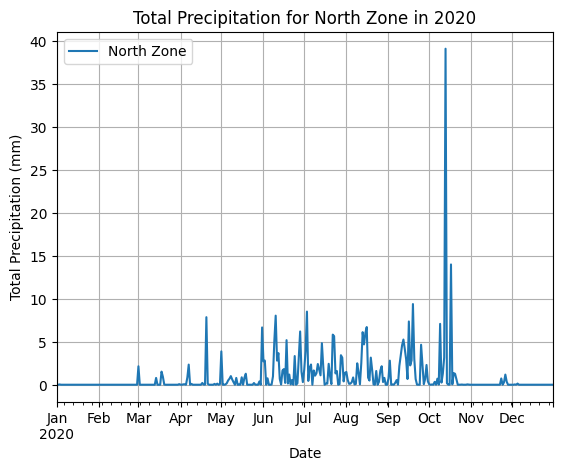

<Figure size 1500x1000 with 0 Axes>

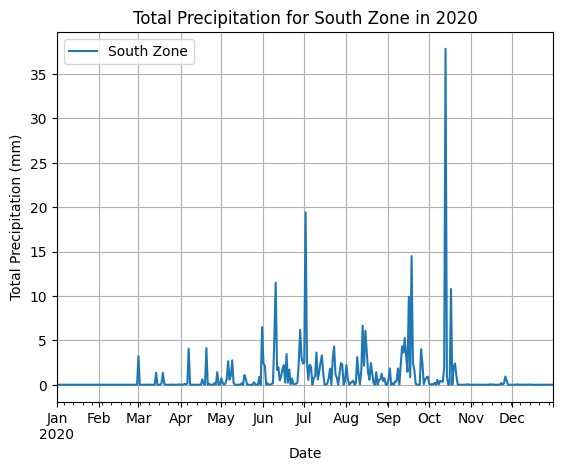

<Figure size 1500x1000 with 0 Axes>

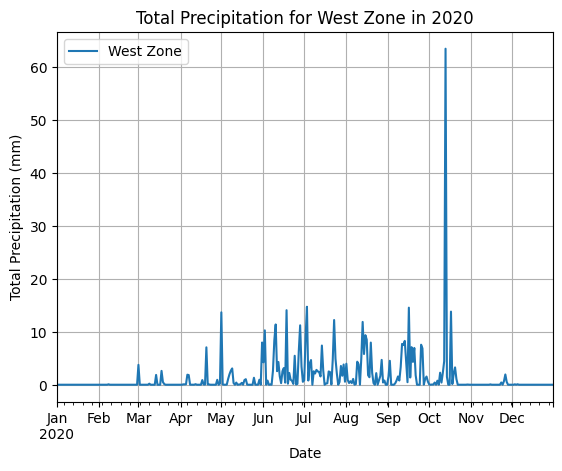

<Figure size 1500x1000 with 0 Axes>

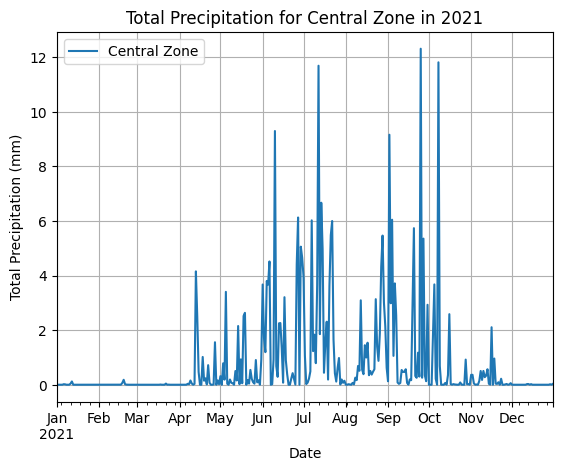

<Figure size 1500x1000 with 0 Axes>

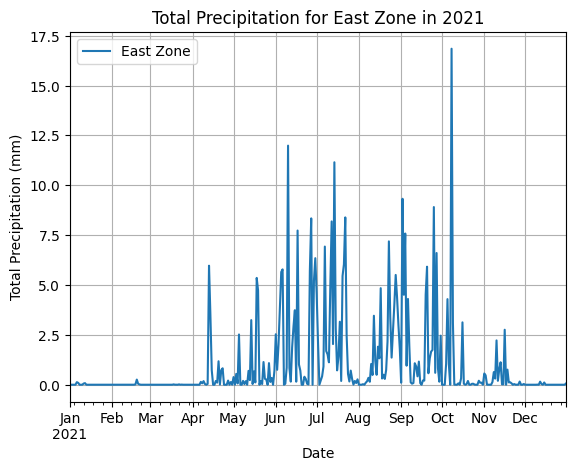

<Figure size 1500x1000 with 0 Axes>

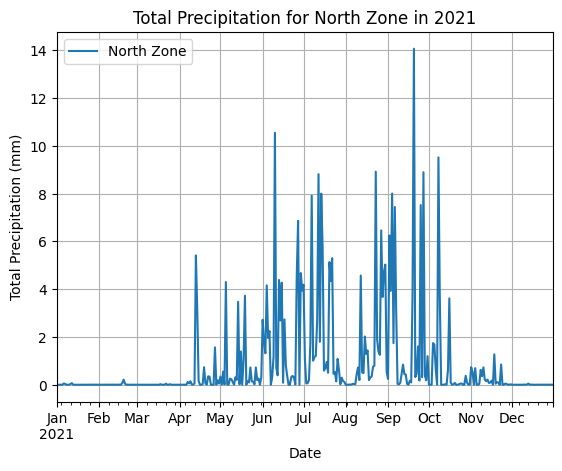

<Figure size 1500x1000 with 0 Axes>

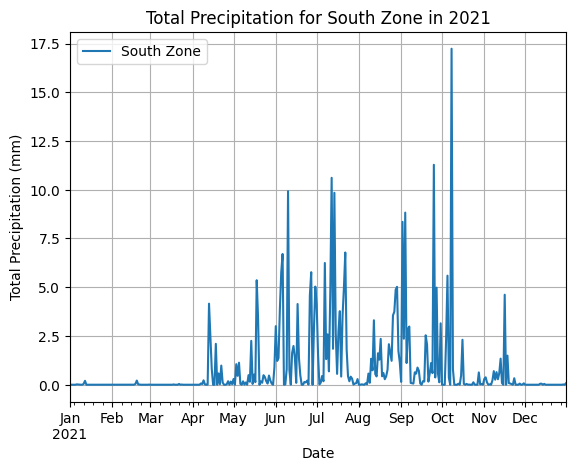

<Figure size 1500x1000 with 0 Axes>

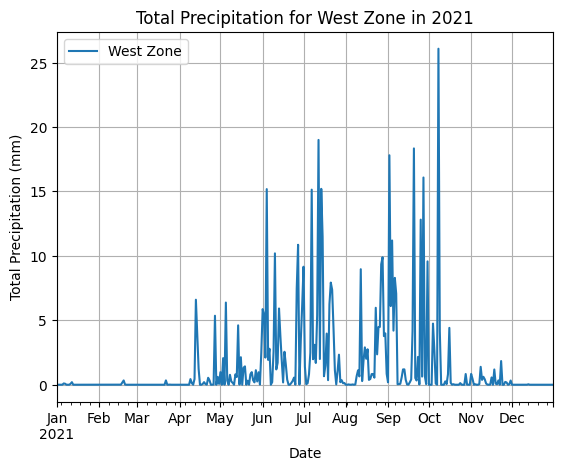

<Figure size 1500x1000 with 0 Axes>

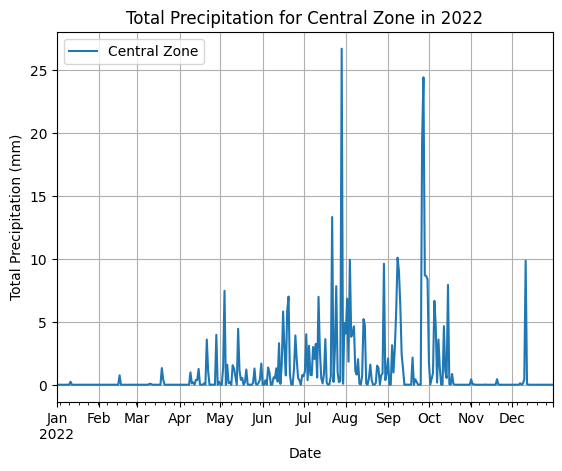

<Figure size 1500x1000 with 0 Axes>

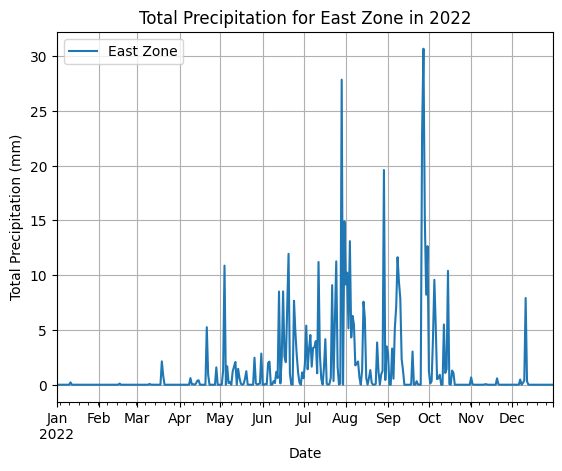

<Figure size 1500x1000 with 0 Axes>

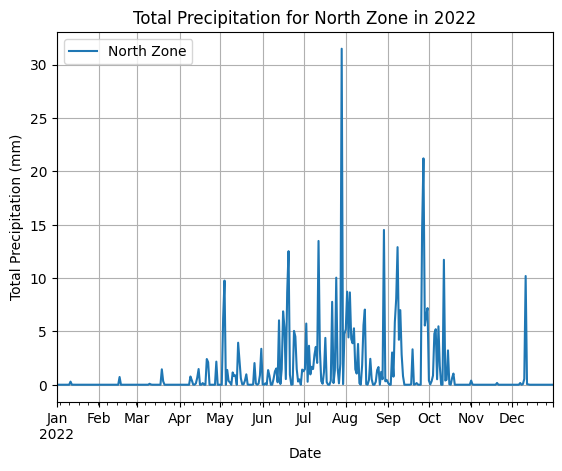

<Figure size 1500x1000 with 0 Axes>

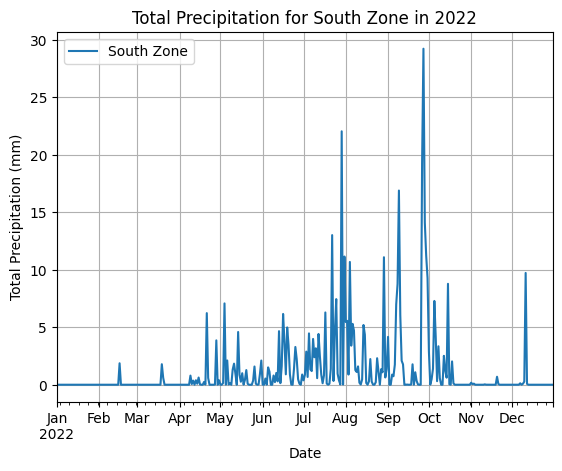

<Figure size 1500x1000 with 0 Axes>

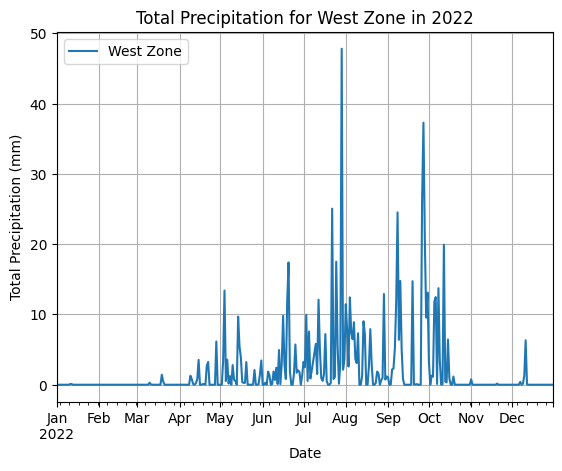

In [28]:

#year wise trend and seasonlity analysis for each region


# Get unique years in the dataset
years = precipitation_by_zone_date['Date'].dt.year.unique()

# Iterate over each year
for year in years:
    # Filter the data for the current year
    data_year = precipitation_by_zone_date[precipitation_by_zone_date['Date'].dt.year == year]
    
    # Iterate over each zone
    for zone_name, data_zone in data_year.groupby('Zone_Name'):
        # Create pivot table for the current zone
        pivot_table = data_zone.pivot(index='Date', columns='Zone_Name', values='Precipitation_mm')
        
        # Plotting
        plt.figure(figsize=(15, 10))
        pivot_table.plot(title=f'Total Precipitation for {zone_name} in {year}', xlabel='Date', ylabel='Total Precipitation (mm)')
        plt.legend(loc='upper left')
        plt.grid(True)
        plt.show()


#### Chekcing relationship between the variables

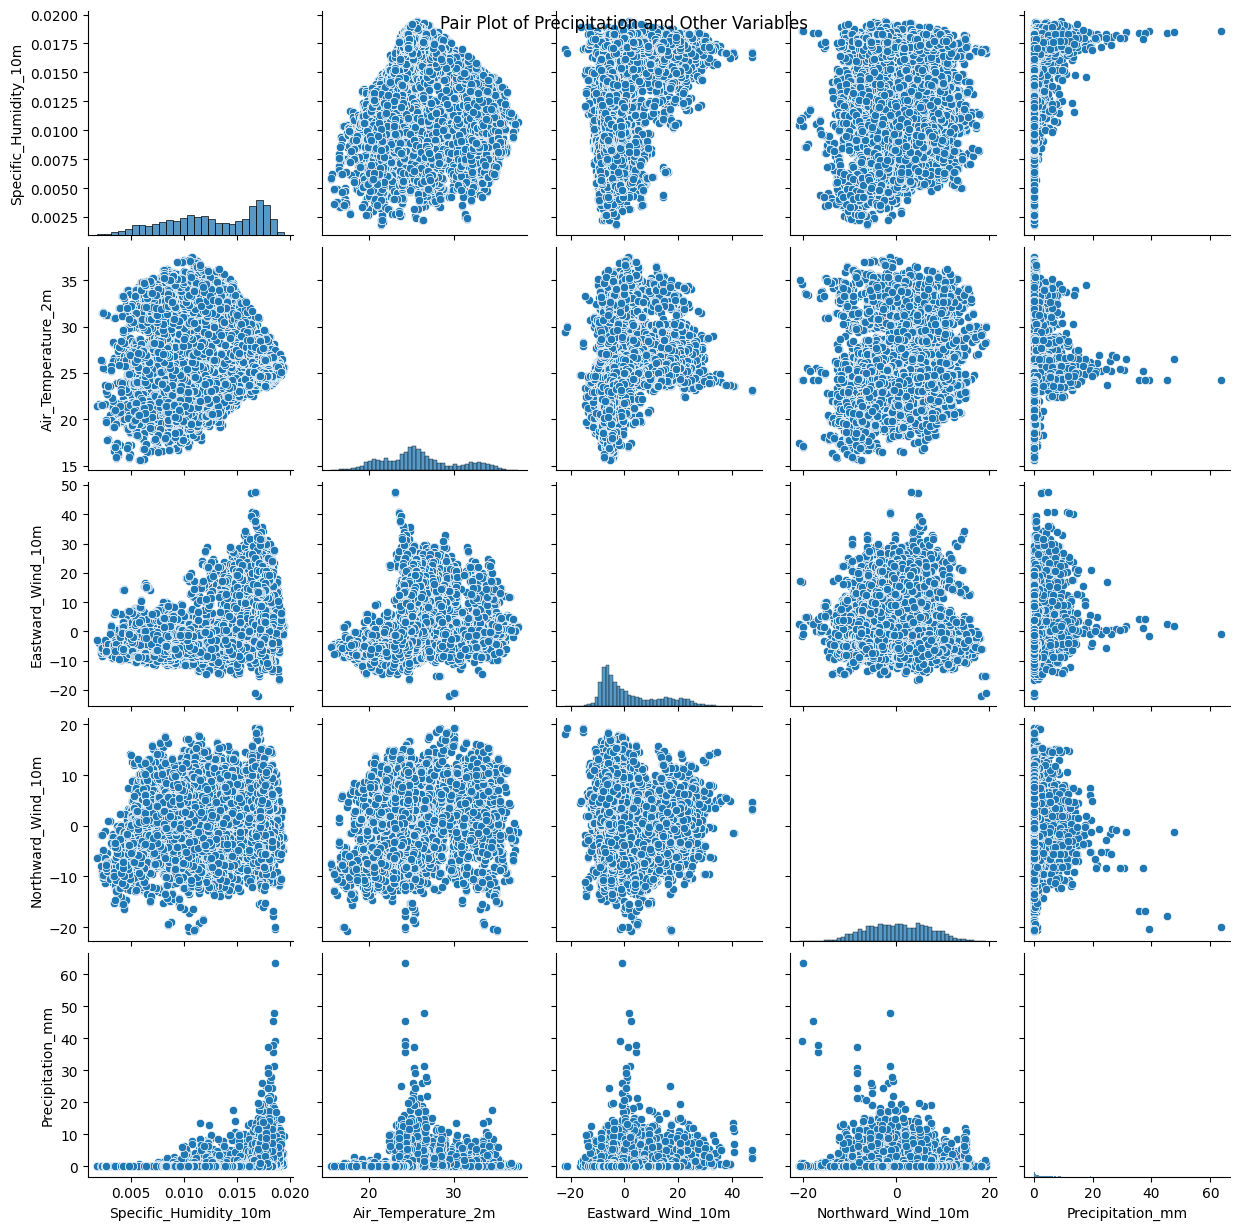

In [31]:

# Plot pair plot
sns.pairplot(df, vars=['Specific_Humidity_10m', 'Air_Temperature_2m', 'Eastward_Wind_10m', 'Northward_Wind_10m', 'Precipitation_mm'])
plt.suptitle('Pair Plot of Precipitation and Other Variables')
plt.show()


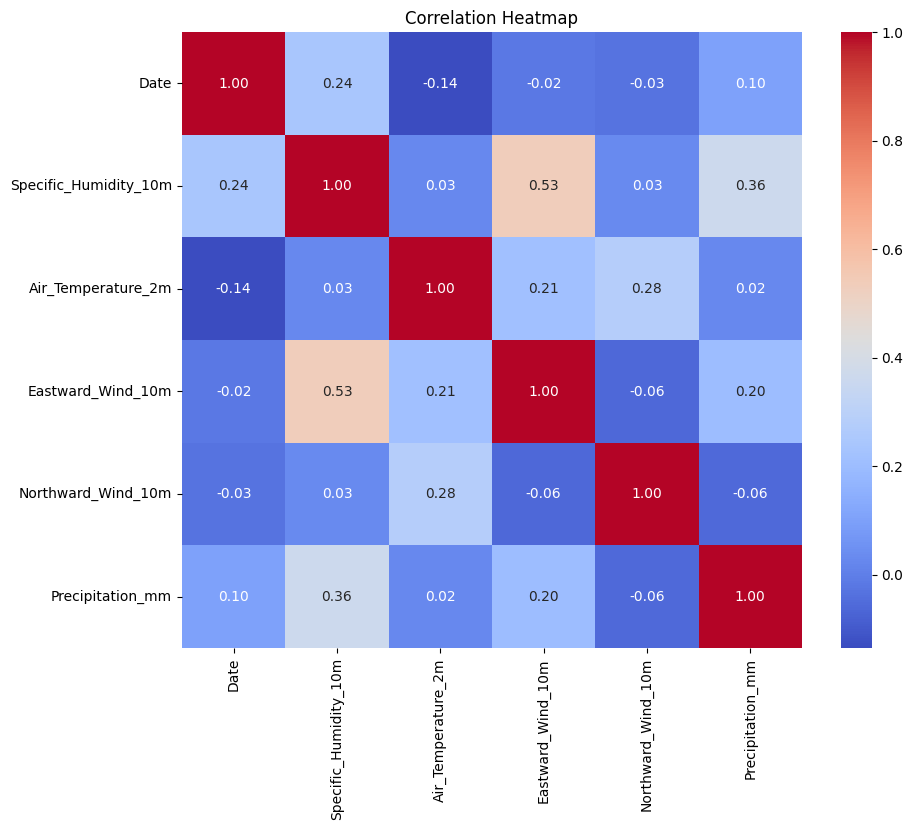

In [34]:
# Calculate correlation matrix
corr_matrix =df[['Date','Specific_Humidity_10m', 'Air_Temperature_2m', 'Eastward_Wind_10m', 'Northward_Wind_10m', 'Precipitation_mm']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

Final Observations on Weather Patterns in Hyderabad

Temperature and Humidity:

- There appears to be a **positive correlation** between Specific Humidity_10m and Air Temperature_2m, as expected. Warmer air can hold more moisture.

Humidity and Precipitation:

- The pair plot suggested a possible link between Specific Humidity_10m and Precipitation_mm. The heatmap shows a **weak positive correlation**, hinting that higher humidity might be associated with higher precipitation amounts, although further analysis is needed.

Wind and Weather:

- The heatmap indicates a **negative correlation** between Eastward_Wind_10m and both Specific Humidity_10m and Precipitation_mm. This suggests that easterly winds might bring drier conditions with lower humidity and precipitation.
- Northward_Wind_10m shows a **weak negative correlation** with Precipitation_mm in the heatmap. While the strength is low, it might be worth exploring further to see if there's a connection between northerly winds and precipitation patterns.
- There appears to be **no significant correlation** between Eastward_Wind_10m and Northward_Wind_10m, suggesting they might be independent wind components.


Overall, these observations suggest that specific humidity, temperature, and wind direction all play a role in shaping Hyderabad's weather patterns. By combining these findings with additional data analysis, you can gain a deeper understanding of the complex interactions between these weather variables and how they influence precipitation and overall weather conditions in the city.


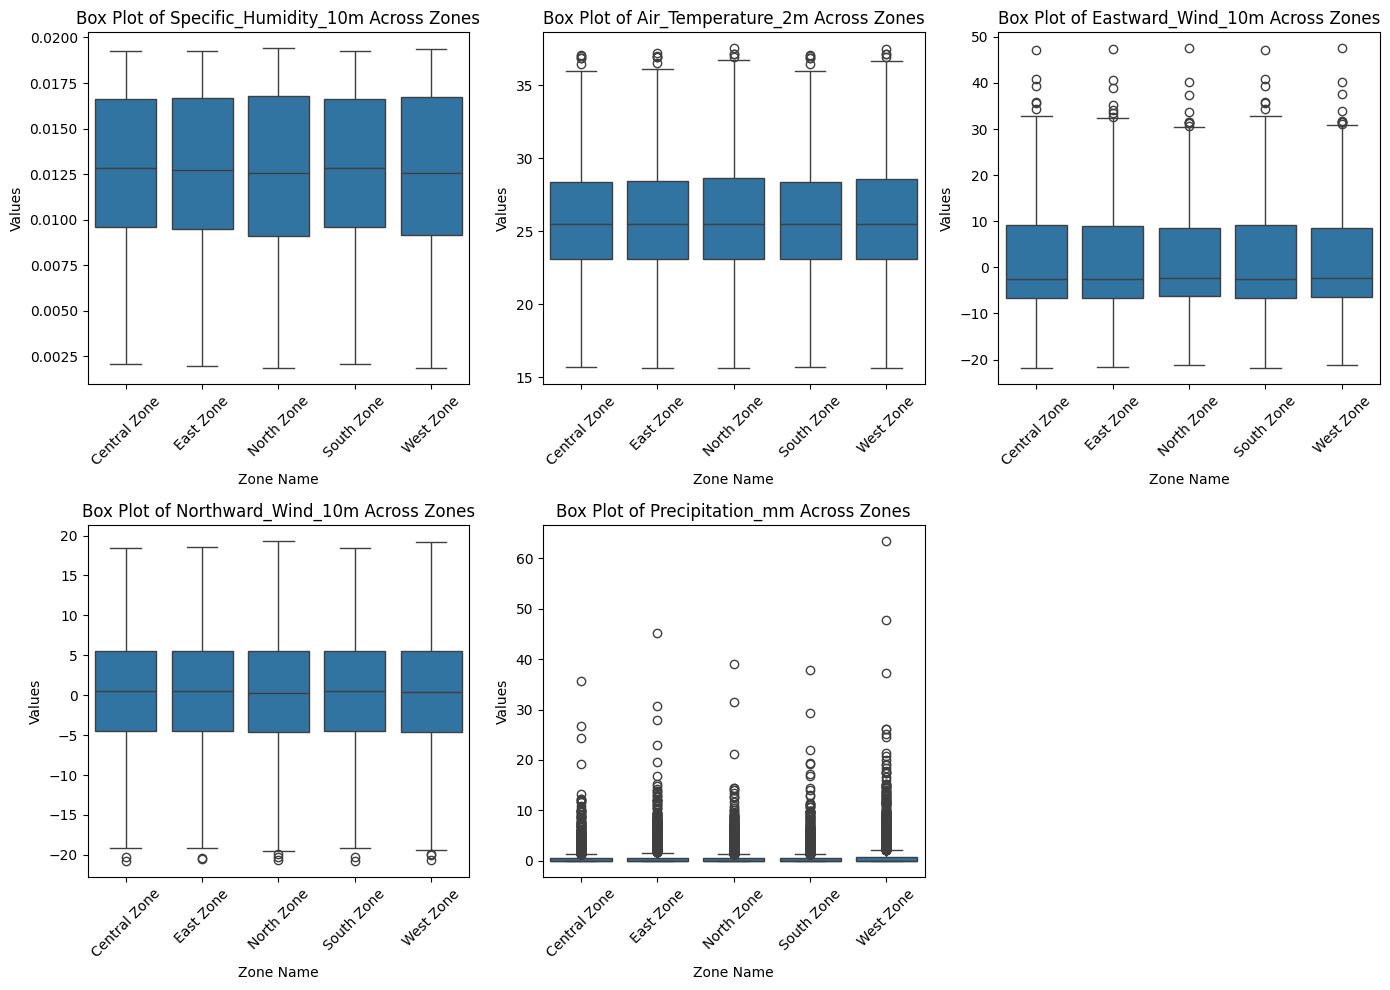

In [36]:
#checking outliers and distribution

# Variables to plot
variables = ['Specific_Humidity_10m', 'Air_Temperature_2m', 'Eastward_Wind_10m', 'Northward_Wind_10m', 'Precipitation_mm']

# Plot box plots for each variable across different zones
plt.figure(figsize=(14, 10))
for i, var in enumerate(variables):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Zone_Name', y=var, data=df)
    plt.title(f'Box Plot of {var} Across Zones')
    plt.xlabel('Zone Name')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Spread of Precipitation:** The box plots show that the distribution of precipitation varies across the zones. The Central zone has the widest box (interquartile range), indicating the greatest spread in precipitation amounts. This suggests that precipitation in the Central zone can range from very low to very high values compared to the other zones.

**Central Tendency:** The medians (lines within the boxes) reveal the typical precipitation values for each zone. The South zone appears to have the highest median precipitation, followed by the East zone. The Central, North, and West zones have generally lower median precipitation.

**Variability:** The presence of outliers (data points beyond the whiskers) also indicates variability. The Central zone again has the most outliers, suggesting that it can experience occasional very high or very low precipitation events compared to the other zones.

**Zone-wise Observations:**
- **Central Zone:** Wide box with outliers, indicating high variability in precipitation amounts. The median suggests moderate precipitation, but there can be occasional extremes.
- **East Zone:** The box is narrower than the Central zone, suggesting less variability. The median indicates moderately high precipitation.
- **North Zone:** The box width is similar to the East zone, but the median is lower, suggesting generally lower precipitation amounts.
- **South Zone:** The narrow box and lack of outliers imply less variability. The highest median precipitation suggests this zone receives the most precipitation overall.
- **West Zone:** The box width is moderate, and there are a few outliers. The median suggests moderately low precipitation amounts.
